In [1]:
from __future__ import annotations

import matplotlib.pyplot as plt
import numpy as np

from curvelets.numpy import UDCT, SimpleUDCT
from curvelets.plot import create_inset_axes_grid, overlay_arrows, overlay_disk
from curvelets.utils import apply_along_wedges, normal_vector_field

In [11]:
inputfile = "../testdata/sigmoid.npz"

data = np.load(inputfile)
data = data["sigmoid"][:100, :64]
# data = data["sigmoid"][:128, :64].T
# data = data["sigmoid"][128:, :64]
nx, nz = data.shape
dx, dz = 0.005, 0.004
x, z = np.arange(nx) * dx, np.arange(nz) * dz

[Text(0.5, 0, 'Position [km]'),
 Text(0, 0.5, 'Depth [km]'),
 Text(0.5, 1.0, 'Data')]

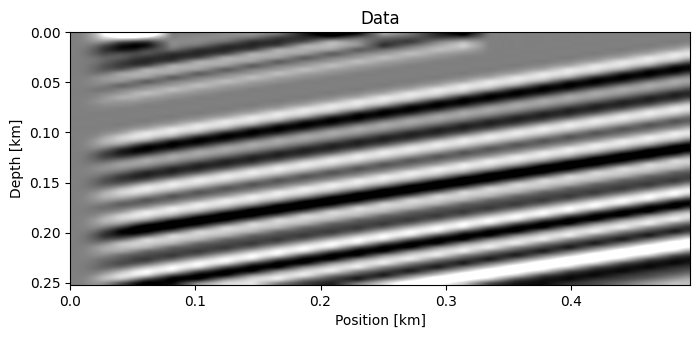

In [12]:
aspect = dz / dx
figsize_aspect = aspect * nz / nx
opts_space = {
    "extent": (x[0], x[-1], z[-1], z[0]),
    "cmap": "gray",
    "interpolation": "lanczos",
    "aspect": aspect,
}
vmax = 0.5 * np.max(np.abs(data))
fig, ax = plt.subplots(figsize=(8, figsize_aspect * 8))
ax.imshow(data.T, vmin=-vmax, vmax=vmax, **opts_space)
ax.set(xlabel="Position [km]", ylabel="Depth [km]", title="Data")
# fig.tight_layout()


In [13]:
# Due to the way the UDCT operates, if we want to align curvelet features to the image,
# we must use `transpose` mode. This is a remnant of the way the UDCT was developed for
# MATLAB (column-major). This mode is more innefficient, but is generally not required.

In [14]:
# Cop = UDCT(data.shape, cfg=np.array([[3, 3], [3, 6], [3, 12]]), transpose=False)
# Cop = UDCT(data.shape, cfg=np.array([[3, 3], [10, 3]]), transpose=True)
Cop = SimpleUDCT(data.shape, nscales=3, nbands_per_direction=3, transpose=True)

In [15]:
d_c = Cop.forward(data)

In [16]:
energy = apply_along_wedges(d_c, lambda w, *_: np.sqrt((np.abs(w) ** 2).mean()))

In [31]:
kvecs = normal_vector_field(data, 1, 1)
kvecs *= 0.4 * min(x[-1] - x[0], z[-1] - z[0])

[Text(0.5, 0, 'Position [km]'),
 Text(0, 0.5, 'Depth [km]'),
 Text(0.5, 1.0, 'Data')]

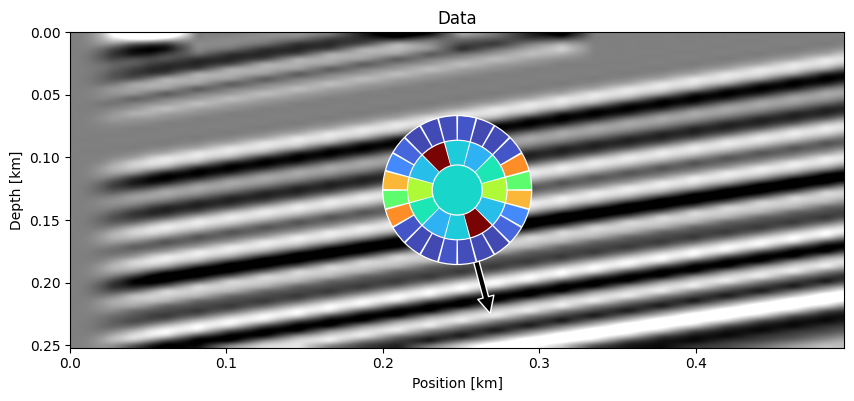

In [32]:
fig, ax = plt.subplots(figsize=(12, figsize_aspect * 8))
ax.imshow(data.T, vmin=-vmax, vmax=vmax, **opts_space)
overlay_arrows(kvecs, ax, arrowprops={"edgecolor": "w", "facecolor": "k"})
ax_o = create_inset_axes_grid(ax, width=0.4, kwargs_inset_axes={"projection": "polar"})
overlay_disk(energy, ax=ax_o, vmin=0, cmap="turbo", linecolor="w", linewidth=5)
ax.set(xlabel="Position [km]", ylabel="Depth [km]", title="Data")